In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe().round(2)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [7]:
df.drop(['customer_id'],axis=1,inplace=True)

In [8]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: xlabel='active_member', ylabel='Count'>

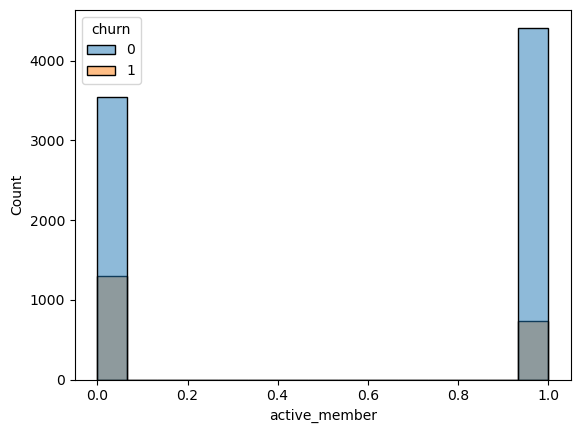

In [12]:
sns.histplot(
    data=df,
    x="active_member",
    hue="churn")

<Axes: xlabel='credit_score'>

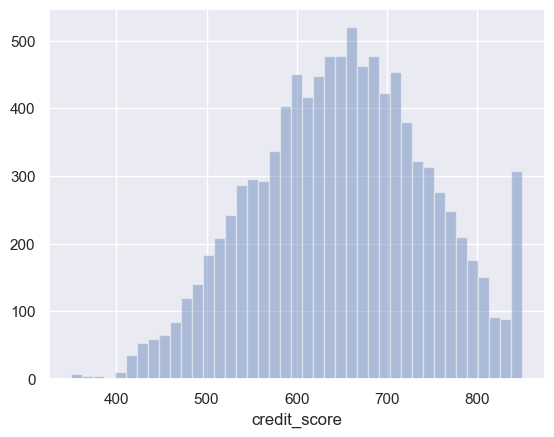

In [13]:
sns.set(style="darkgrid")

sns.distplot( a=df["credit_score"],hist=True, kde=False, rug=False )

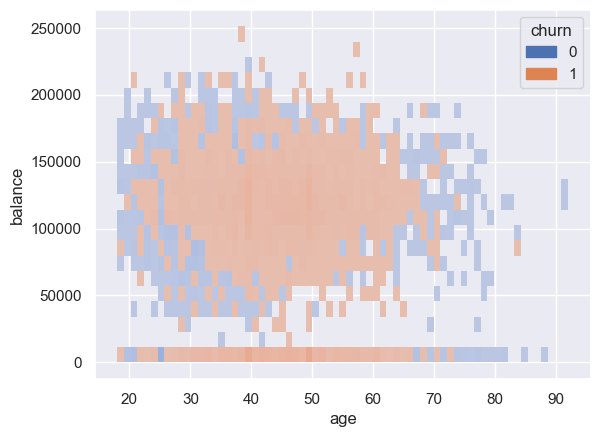

In [14]:
sns.histplot(
    data=df,
    x="age",
    y="balance",
    hue="churn",
)
plt.show()

In [15]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df['country'] = df['country'].map({'France': 0, 'Spain' : 1,'Germany':2})

In [17]:
df['gender'] = df['gender'].map({'Male': 0, 'Female' : 1})

In [18]:
df['balance']=df['balance'].astype(int)

In [19]:
df['estimated_salary']=df['estimated_salary'].astype(int)

In [20]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0,1,1,1,101348,1
1,608,1,1,41,1,83807,1,0,1,112542,0
2,502,0,1,42,8,159660,3,1,0,113931,1
3,699,0,1,39,1,0,2,0,0,93826,0
4,850,1,1,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0,2,1,0,96270,0
9996,516,0,0,35,10,57369,1,1,1,101699,0
9997,709,0,1,36,7,0,1,0,1,42085,1
9998,772,2,0,42,3,75075,2,1,0,92888,1


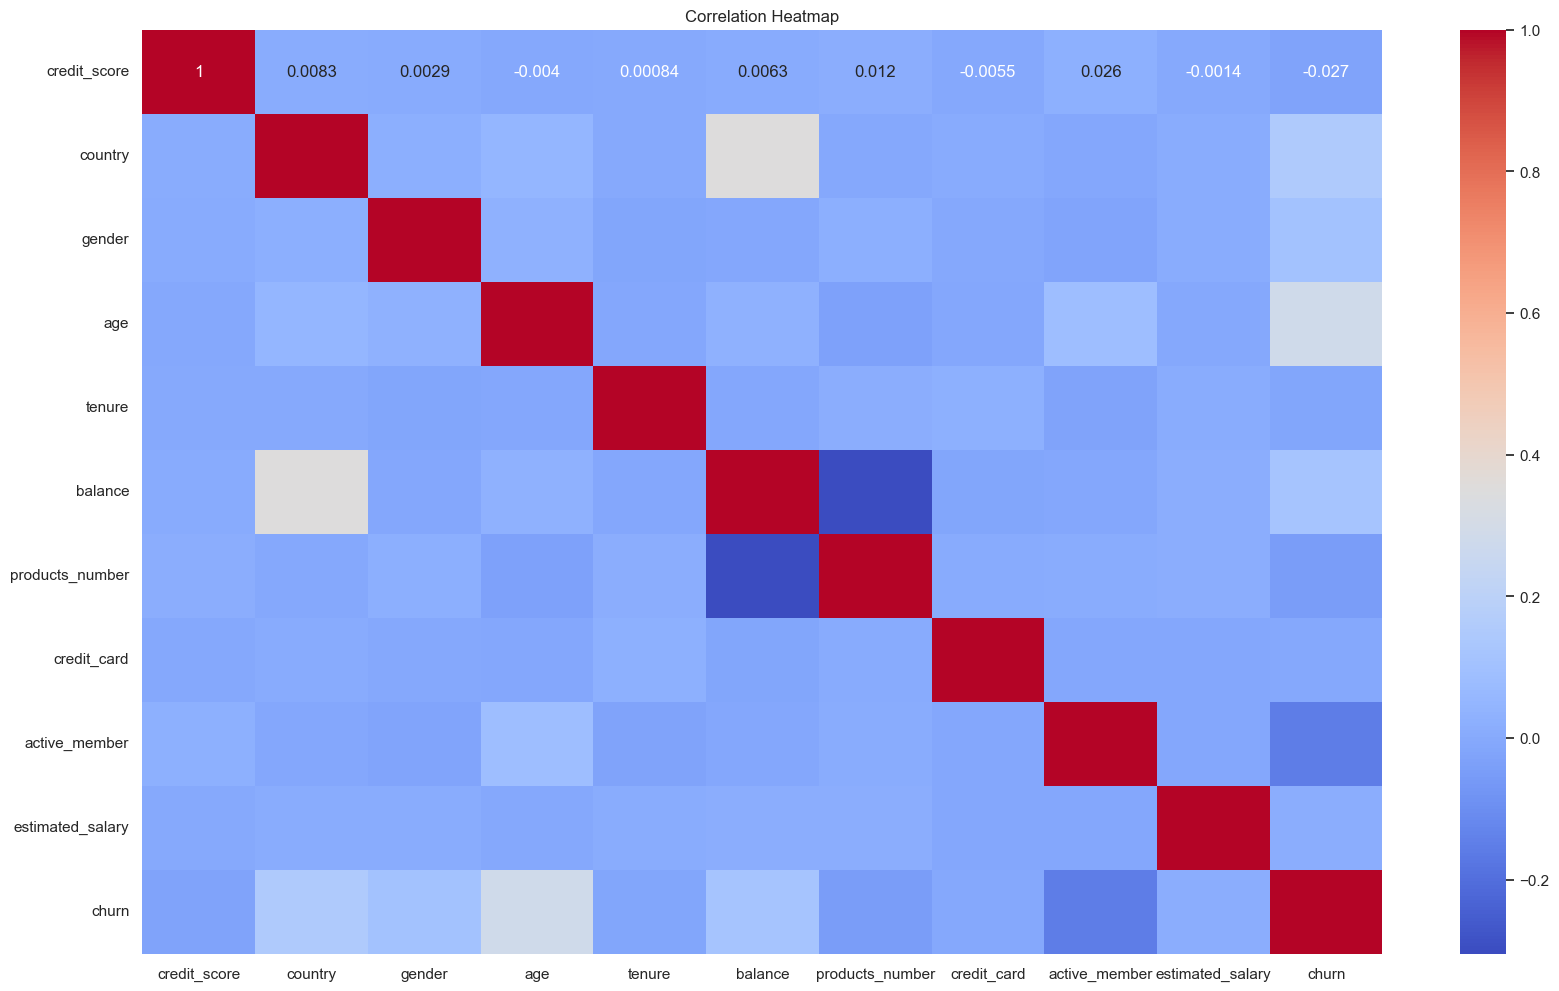

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='balance', ylabel='country'>

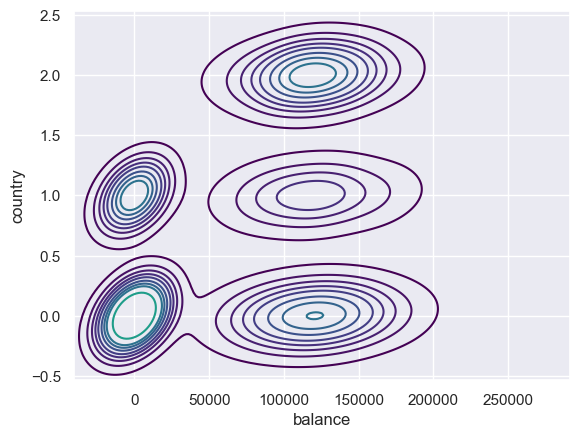

In [22]:
sns.kdeplot(
    data=df,
    x="balance",
    y="country",
    cmap="viridis")

<Axes: xlabel='balance', ylabel='country'>

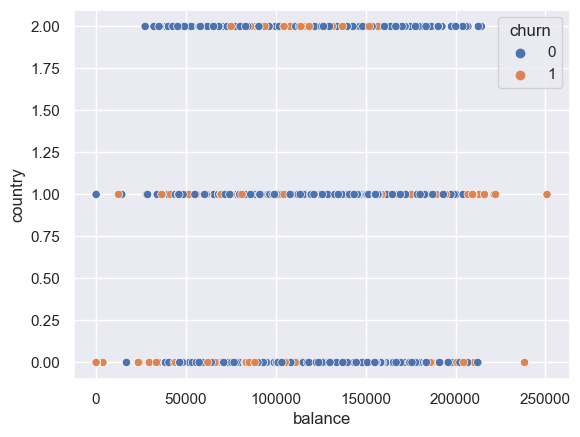

In [23]:
sns.scatterplot(
    data=df,
    x="balance",
    y="country",
    hue="churn" 
)

<Axes: xlabel='products_number', ylabel='balance'>

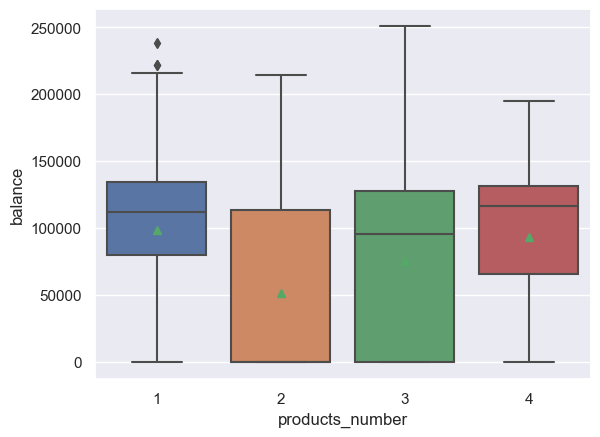

In [24]:
sns.boxplot(
    x="products_number",
    y="balance",
    showmeans=True,
    data=df
)

<Axes: xlabel='country', ylabel='Count'>

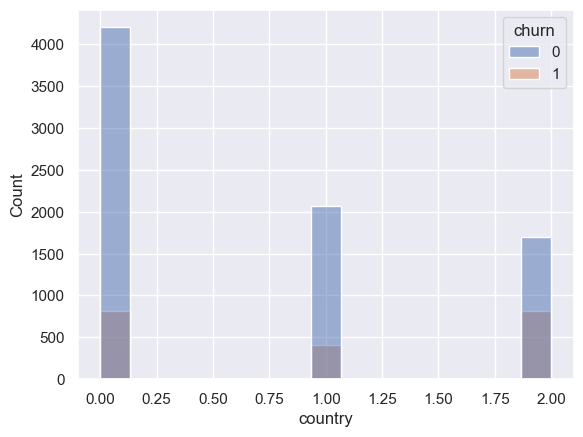

In [25]:
sns.histplot(
    data=df,
    x="country",
    hue="churn")

In [32]:
df['gender'] = df['gender'].astype(str)
df['churn'] = df['churn'].astype(str)

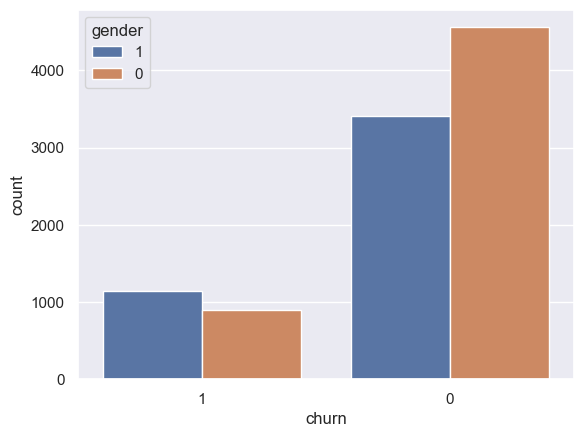

In [33]:
sns.countplot(x="churn",hue="gender", data=df)
plt.show()

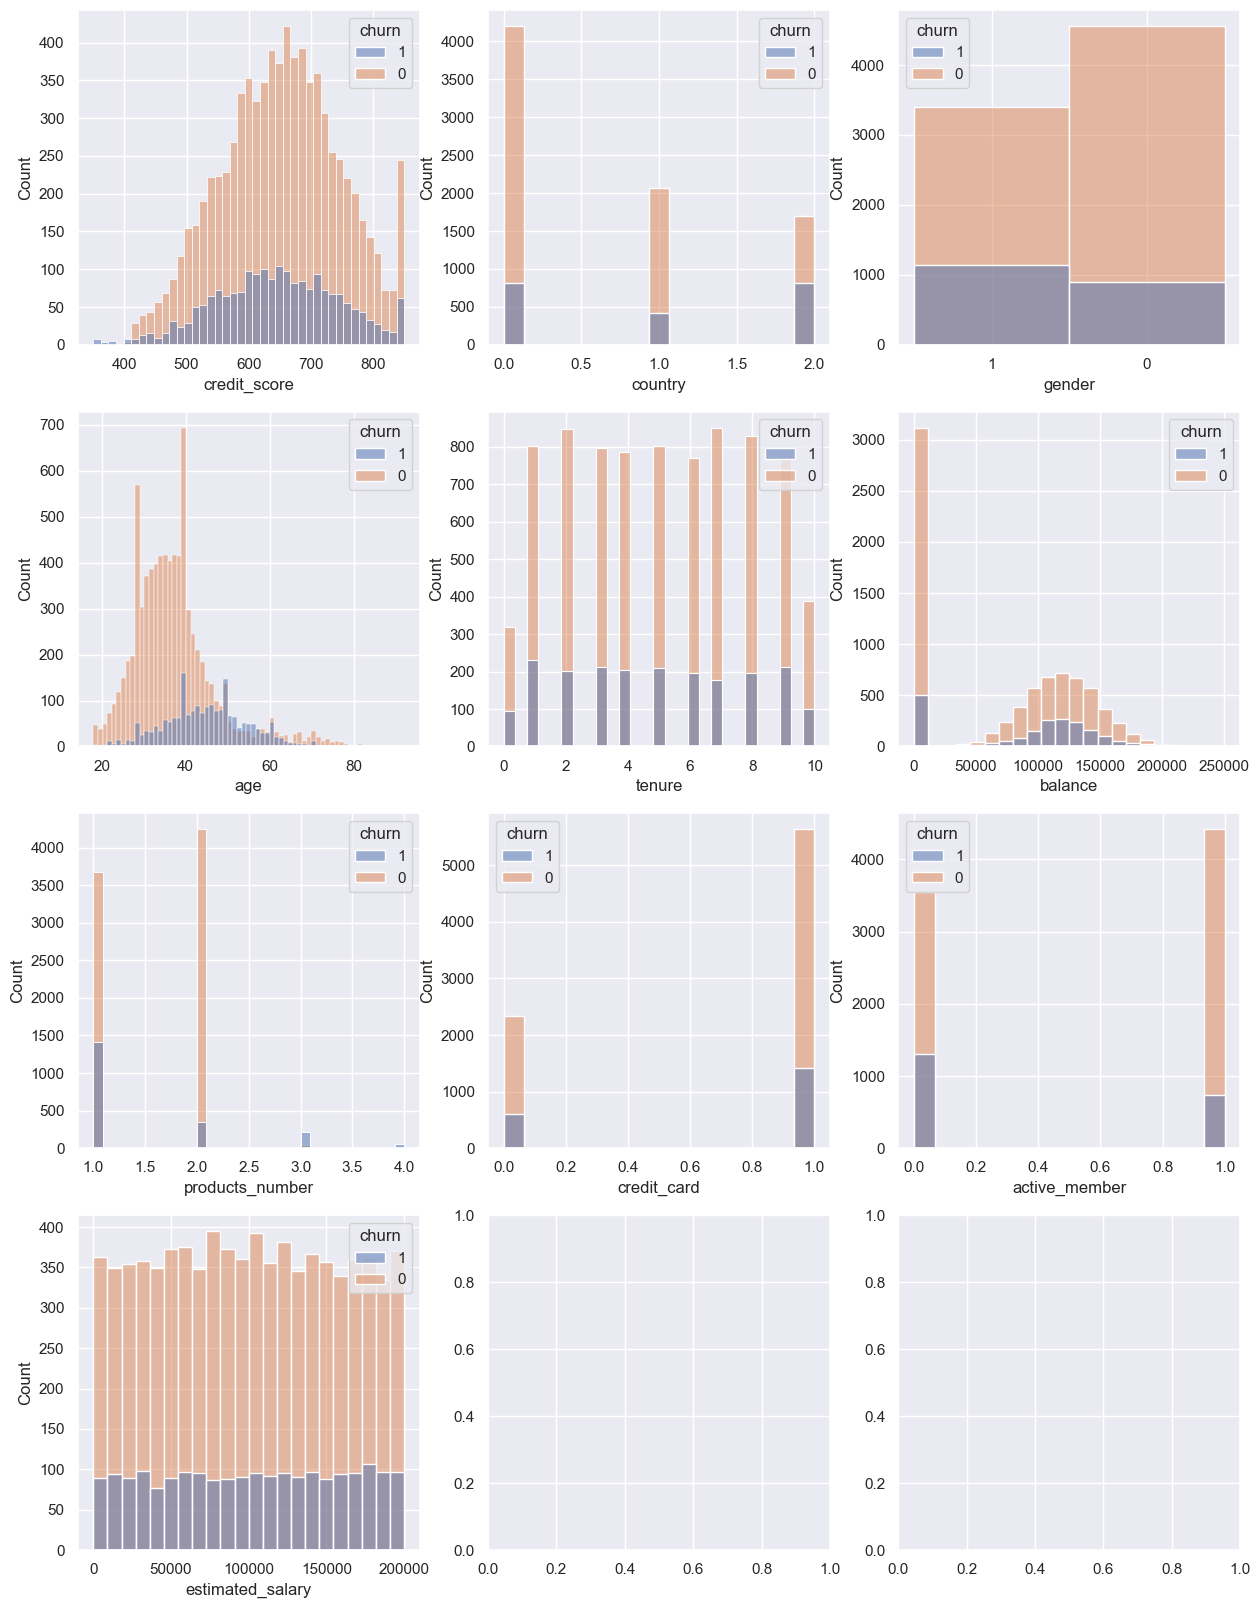

In [34]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)-1):
    sns.histplot(data=df, x=df.columns[i],hue="churn",ax=axs[i])

In [35]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0,1,1,1,101348,1
1,608,1,1,41,1,83807,1,0,1,112542,0
2,502,0,1,42,8,159660,3,1,0,113931,1
3,699,0,1,39,1,0,2,0,0,93826,0
4,850,1,1,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0,2,1,0,96270,0
9996,516,0,0,35,10,57369,1,1,1,101699,0
9997,709,0,1,36,7,0,1,0,1,42085,1
9998,772,2,0,42,3,75075,2,1,0,92888,1


In [36]:
x=df.drop(columns='churn') 
y=df['churn']

In [37]:
x.shape

(10000, 10)

In [38]:
y.shape

(10000,)

In [39]:
x

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,1,42,2,0,1,1,1,101348
1,608,1,1,41,1,83807,1,0,1,112542
2,502,0,1,42,8,159660,3,1,0,113931
3,699,0,1,39,1,0,2,0,0,93826
4,850,1,1,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0,2,1,0,96270
9996,516,0,0,35,10,57369,1,1,1,101699
9997,709,0,1,36,7,0,1,0,1,42085
9998,772,2,0,42,3,75075,2,1,0,92888


In [40]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: object

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [42]:
x_train.shape

(8000, 10)

In [43]:
y_train.shape

(8000,)

In [44]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


In [45]:
sc= StandardScaler()
x_train_rescaled = sc.fit_transform(x_train)
x_test_rescaled = sc.transform(x_test)

In [46]:
x_train_rescaled

array([[ 0.35649971, -0.90598864, -0.91324755, ...,  0.64920267,
         0.97481699,  1.36767384],
       [-0.20389777,  1.50315516, -0.91324755, ...,  0.64920267,
         0.97481699,  1.66124779],
       [-0.96147213,  0.29858326, -0.91324755, ...,  0.64920267,
        -1.02583358, -0.25279868],
       ...,
       [ 0.86500853, -0.90598864,  1.09499335, ..., -1.54035103,
        -1.02583358, -0.14275844],
       [ 0.15932282, -0.90598864, -0.91324755, ...,  0.64920267,
        -1.02583358, -0.05081773],
       [ 0.47065475,  1.50315516, -0.91324755, ...,  0.64920267,
         0.97481699, -0.81456203]])

In [47]:
x_test_rescaled

array([[-0.57749609,  1.50315516, -0.91324755, ..., -1.54035103,
        -1.02583358, -1.01960304],
       [-0.29729735, -0.90598864, -0.91324755, ...,  0.64920267,
         0.97481699,  0.79888628],
       [-0.52560743,  0.29858326,  1.09499335, ...,  0.64920267,
        -1.02583358, -0.72797641],
       ...,
       [ 0.81311987, -0.90598864,  1.09499335, ...,  0.64920267,
        -1.02583358, -1.16591188],
       [ 0.41876609, -0.90598864, -0.91324755, ...,  0.64920267,
        -1.02583358, -0.41164331],
       [-0.24540869,  1.50315516, -0.91324755, ...,  0.64920267,
         0.97481699,  0.12593517]])

In [48]:
classifier = RandomForestClassifier( n_estimators=100,criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,)
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = classifier.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

Accuracy: 86.7
